# Melanoma Detection

**Problem statement:** To build a CNN based model which can accurately detect Melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [44]:
# Importing the libraries
import pathlib
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/My Drive/Datasets/ISIC Skin Cancer Dataset/Train/")
data_dir_test = pathlib.Path('/content/drive/My Drive/Datasets/ISIC Skin Cancer Dataset/Test/')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## Creating datasets

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
# Preparing the training dataset
train_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train, seed=123, image_size=(img_height, img_width), batch_size=batch_size, validation_split=0.2, subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
# Preparing the validation dataset
val_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train, seed=123, image_size=(img_height, img_width), batch_size=batch_size, validation_split=0.2, subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# Listing out all the classes of skin cancer and store them in a list.
class_names = train_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

## Visualizing data

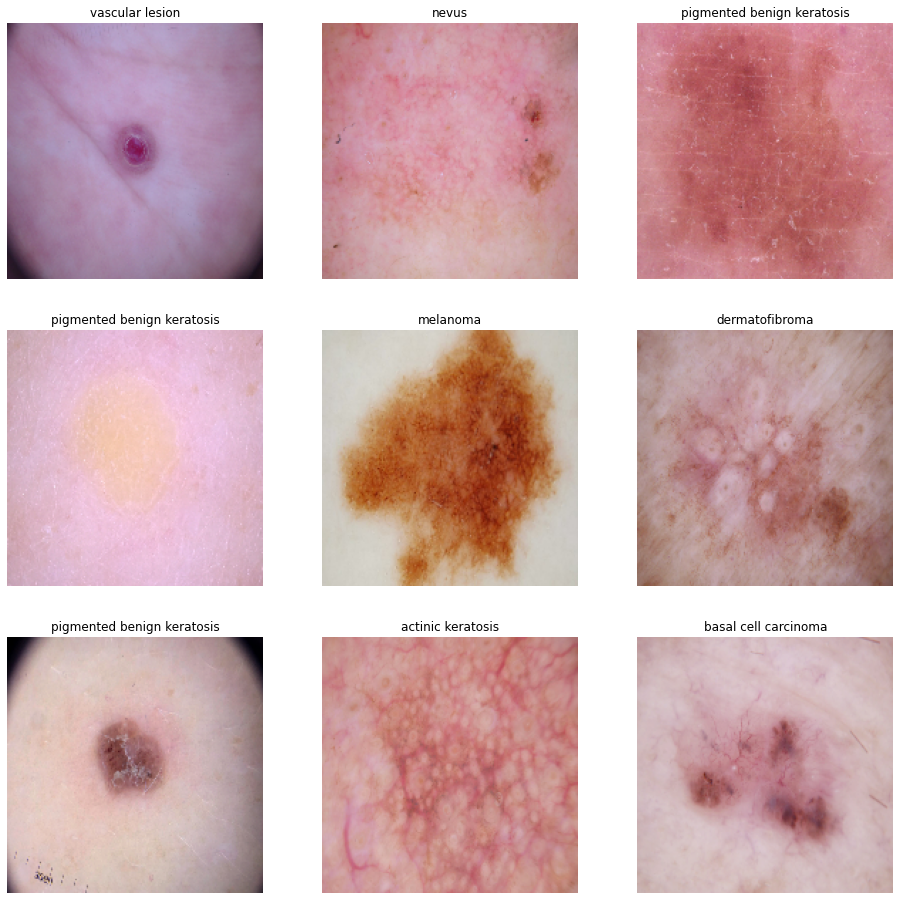

In [9]:
# Checking images from each class
plt.figure(figsize=(16, 16))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Model 1

In [10]:
# Configuring the dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
# Creating CNN model
num_classes = len(class_names)

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [13]:
# Compiling the model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 128)      

### Model Training

In [15]:
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 11s 35ms/step - loss: 2.2085 - accuracy: 0.2651 - val_loss: 1.6544 - val_accuracy: 0.4027
Epoch 2/20
56/56 [==============================] - 1s 12ms/step - loss: 1.6226 - accuracy: 0.4224 - val_loss: 1.5701 - val_accuracy: 0.4519
Epoch 3/20
56/56 [==============================] - 1s 12ms/step - loss: 1.5295 - accuracy: 0.4648 - val_loss: 1.4095 - val_accuracy: 0.5235
Epoch 4/20
56/56 [==============================] - 1s 12ms/step - loss: 1.3948 - accuracy: 0.5006 - val_loss: 1.3905 - val_accuracy: 0.5235
Epoch 5/20
56/56 [==============================] - 1s 12ms/step - loss: 1.2936 - accuracy: 0.5424 - val_loss: 1.3908 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 1s 12ms/step - loss: 1.2352 - accuracy: 0.5770 - val_loss: 1.6613 - val_accuracy: 0.4362
Epoch 7/20
56/56 [==============================] - 1s 12ms/step - loss: 1.1599 - accuracy: 0.5859 - val_loss: 1.4765 - val_accuracy: 0.5213
Epoch 8/20
5

### Visualizing training results

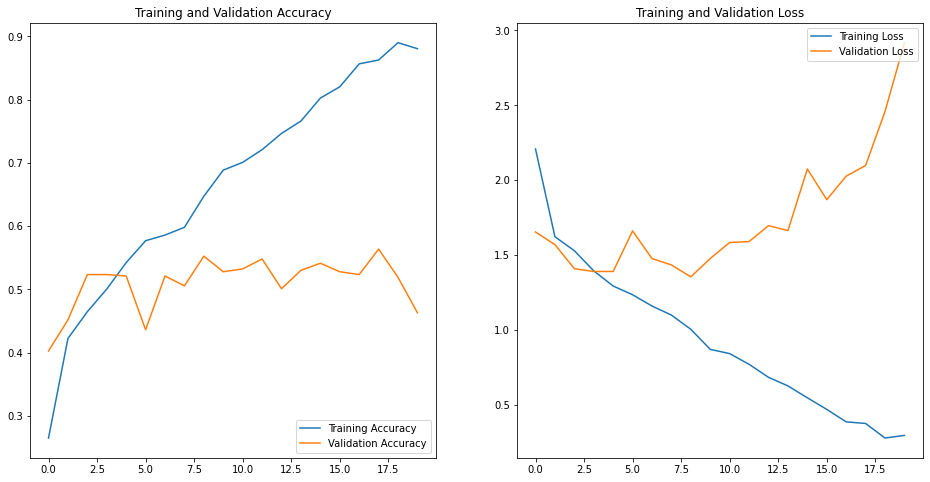

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings

- Model is overfitting as validation accuracy is way lower than training accuracy.
- Throughout the entire training process, training loss kept decreasing, but validation loss kept increasing.

## Model 2
With data augmentation & dropout layers to handle overfitting

In [17]:
model2 = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), # Randomly flip images
    layers.experimental.preprocessing.RandomRotation(0.2), # Randomly rotate images
    layers.experimental.preprocessing.RandomZoom(0.2), # Randomly zoom images
    layers.experimental.preprocessing.RandomTranslation(0.1, 0.1), # Randomly translate images
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.50),
    layers.Dense(num_classes, activation='softmax')
])

In [22]:
# Compiling the model
model2.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [23]:
epochs = 20
history = model2.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20


56/56 [==============================] - 15s 162ms/step - loss: 1.8050 - accuracy: 0.3337 - val_loss: 1.7529 - val_accuracy: 0.3535
Epoch 2/20
56/56 [==============================] - 9s 157ms/step - loss: 1.6434 - accuracy: 0.4169 - val_loss: 1.6446 - val_accuracy: 0.4295
Epoch 3/20
56/56 [==============================] - 9s 158ms/step - loss: 1.5525 - accuracy: 0.4654 - val_loss: 1.4881 - val_accuracy: 0.5056
Epoch 4/20
56/56 [==============================] - 9s 158ms/step - loss: 1.4886 - accuracy: 0.4805 - val_loss: 1.6674 - val_accuracy: 0.4430
Epoch 5/20
56/56 [==============================] - 9s 158ms/step - loss: 1.5083 - accuracy: 0.4715 - val_loss: 1.5178 - val_accuracy: 0.4564
Epoch 6/20
56/56 [==============================] - 9s 157ms/step - loss: 1.4728 - accuracy: 0.4833 - val_loss: 1.5114 - val_accuracy: 0.4787
Epoch 7/20
56/56 [==============================] - 9s 158ms/step - loss: 1.4271 - accuracy: 0.4939 - val_loss: 1.4749 - val_accuracy: 0.5011
Epoch 8/20
56/56

### Visualizing the results

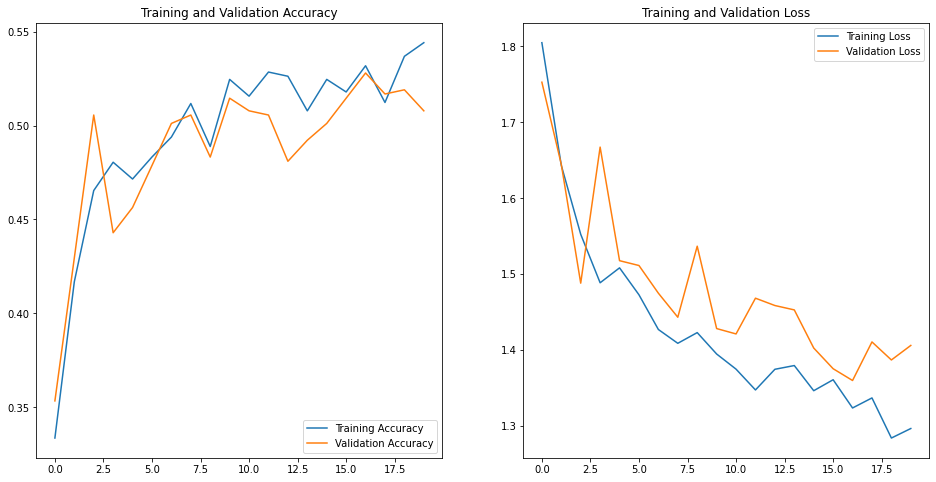

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings

Data augmentation & dropout layers have reduced overfitting significantly, but training accuracy has decreased.

## Class Imbalance

### Class Imbalance Detection

In [40]:
class_imbalance_df = pd.DataFrame(columns=['class', 'count'])
for i in range(len(class_names)):
  class_imbalance_df.loc[i] = [class_names[i], len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))]

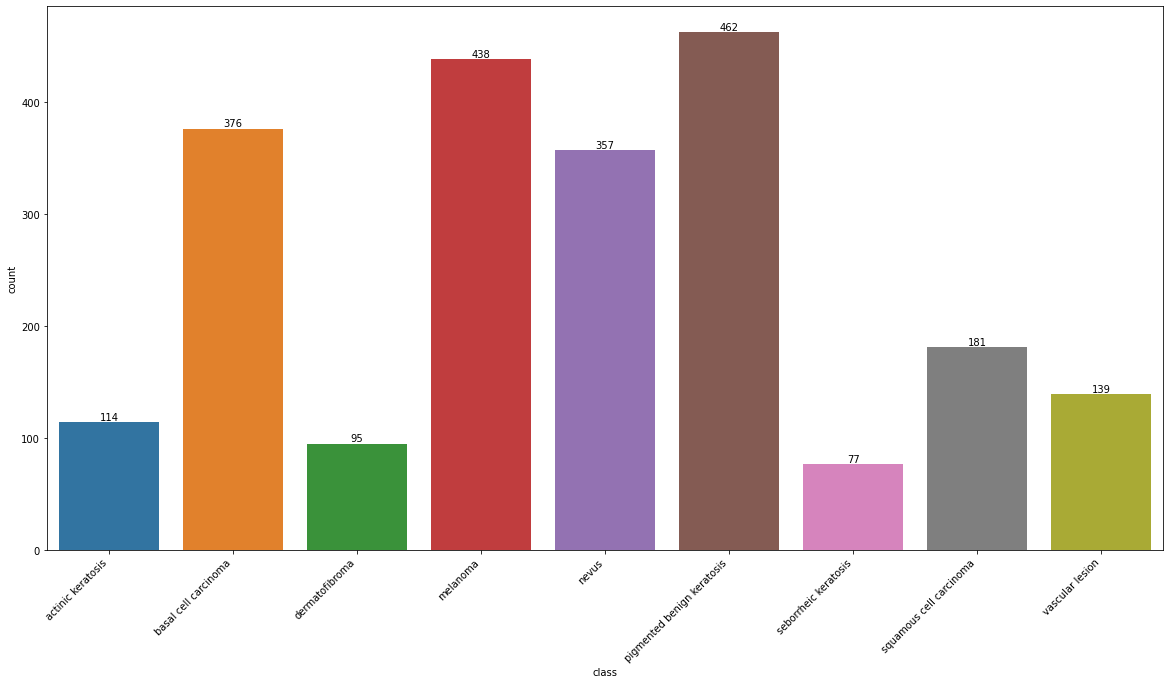

In [54]:
ax = sns.barplot(data=class_imbalance_df, x='class', y='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.figure.set_size_inches(20,10)
plt.bar_label(ax.containers[0])
plt.show()

#### Findings

- `seborrheic keratosis` has least number of samples (77 samples).
- `pigmented benign keratosis` (462 samples), `melanoma` (438 Samples), `basal cell carcinoma` (376 Samples), and `nevus` (357 Samples) classes dominate the data in terms proportionate number of samples.

### Handling Class Imbalances

In [55]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
path_to_training_dataset="/content/drive/My Drive/Datasets/ISIC Skin Cancer Dataset/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/Datasets/ISIC Skin Cancer Dataset/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F01EA265C10>: 100%|██████████| 500/500 [00:04<00:00, 118.59 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/Datasets/ISIC Skin Cancer Dataset/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F02FD723640>: 100%|██████████| 500/500 [00:04<00:00, 119.71 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/Datasets/ISIC Skin Cancer Dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F02FD7E0EE0>: 100%|██████████| 500/500 [00:04<00:00, 119.78 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/Datasets/ISIC Skin Cancer Dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F02FD7385B0>: 100%|██████████| 500/500 [00:17<00:00, 29.12 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/Datasets/ISIC Skin Cancer Dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F02FD825760>: 100%|██████████| 500/500 [00:16<00:00, 30.32 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/Datasets/ISIC Skin Cancer Dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F02FD696490>: 100%|██████████| 500/500 [00:04<00:00, 121.08 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/Datasets/ISIC Skin Cancer Dataset/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F02FD704B50>: 100%|██████████| 500/500 [00:07<00:00, 63.17 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/Datasets/ISIC Skin Cancer Dataset/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F02FD7F0D00>: 100%|██████████| 500/500 [00:03<00:00, 125.62 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/Datasets/ISIC Skin Cancer Dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F02FD7BF040>: 100%|██████████| 500/500 [00:04<00:00, 118.40 Samples/s]


In [57]:
# Counting images generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
image_count_train

4500

#### Checking Distribution of Augmented Data

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [63]:
# Storing path and label of Augmentor images into a new DataFrame
dict_new = dict(zip(path_list, lesion_list_new))
augmentor_df = pd.DataFrame(list(dict_new.items()),columns = ['Path','Label'])
augmentor_df.head()

,Path,Label
0,/content/drive/My Drive/Datasets/ISIC Skin Can...,melanoma
1,/content/drive/My Drive/Datasets/ISIC Skin Can...,melanoma
2,/content/drive/My Drive/Datasets/ISIC Skin Can...,melanoma
3,/content/drive/My Drive/Datasets/ISIC Skin Can...,melanoma
4,/content/drive/My Drive/Datasets/ISIC Skin Can...,melanoma


In [64]:
augmentor_df['Label'].value_counts()

melanoma                      500
dermatofibroma                500
basal cell carcinoma          500
nevus                         500
squamous cell carcinoma       500
pigmented benign keratosis    500
actinic keratosis             500
seborrheic keratosis          500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## Model 3

With data created with augmentor

In [65]:
batch_size = 32
img_height = 180
img_width = 180

### Creating datasets

In [67]:
data_dir_train="/content/drive/My Drive/Datasets/ISIC Skin Cancer Dataset/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [69]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [71]:
# Creating a new CNN model
model3 = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.50),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax')
])

In [74]:
# Compiling the model
model3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [75]:
epochs = 50
history = model3.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/50
169/169 [==============================] - 15s 64ms/step - loss: 1.8511 - accuracy: 0.3399 - val_loss: 3.0796 - val_accuracy: 0.1262
Epoch 2/50
169/169 [==============================] - 11s 62ms/step - loss: 1.4995 - accuracy: 0.4503 - val_loss: 2.8269 - val_accuracy: 0.1299
Epoch 3/50
169/169 [==============================] - 11s 62ms/step - loss: 1.3410 - accuracy: 0.5046 - val_loss: 1.7489 - val_accuracy: 0.3415
Epoch 4/50
169/169 [==============================] - 11s 61ms/step - loss: 1.2292 - accuracy: 0.5449 - val_loss: 1.5423 - val_accuracy: 0.4581
Epoch 5/50
169/169 [==============================] - 11s 61ms/step - loss: 1.1306 - accuracy: 0.5831 - val_loss: 2.1047 - val_accuracy: 0.4402
Epoch 6/50
169/169 [==============================] - 11s 61ms/step - loss: 1.0190 - accuracy: 0.6230 - val_loss: 1.2720 - val_accuracy: 0.5367
Epoch 7/50
169/169 [==============================] - 11s 61ms/step - loss: 0.9559 - accuracy: 0.6508 - val_loss: 1.5594 - val_accuracy:

### Visualize the model results

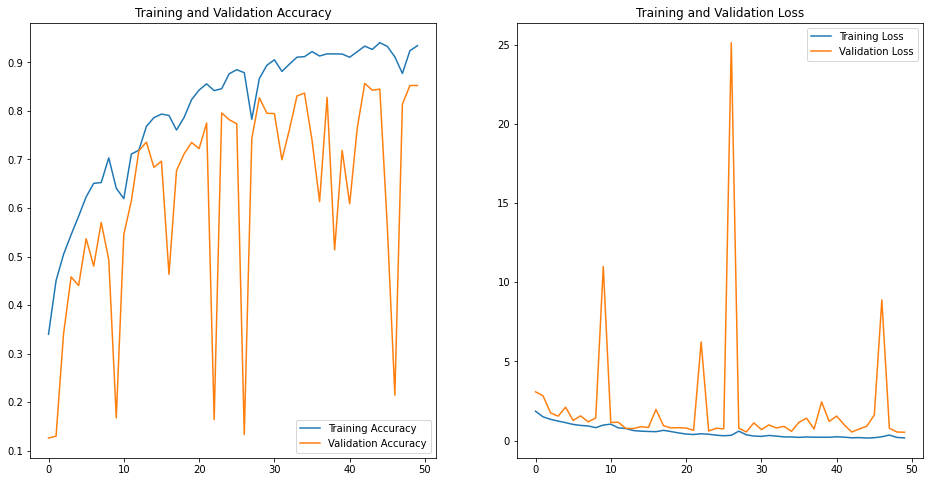

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings

- Training & validation accuracies increased significantly.
- Little bit overfitting is still there.